<a href="https://colab.research.google.com/github/ZackWongAPO/Colab/blob/main/Curve_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#曲线拟合

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import numpy
import matplotlib.pyplot as plt

>调节输入值定义域对拟合结果有很大影响，主要影响的是收敛速度，由于SGD不能自适应收敛速度，这就导致一旦输入定义域在折线变化的区间之外，需要很多epoch才能达到输入定义域在折线变化内的效果，学习速率同样也和输入数据的尺度相关

##train_on_batch与fit之间的区别

##

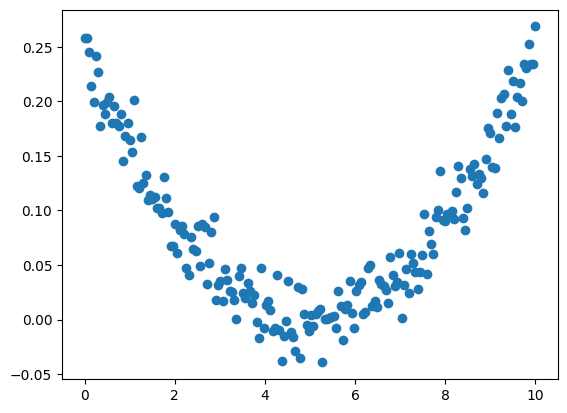

流式输出内容被截断，只能显示最后 5000 行内容。
   0.5675635   0.27251452 -0.2856101  -0.66603804]] [-0.00310693  0.00351165 -0.01486866  0.0047837   0.01290344  0.01175743
  0.00692873  0.00329699  0.00919331 -0.00314346]
1751
[[ 0.40799218  0.27867138  0.18179987 -0.37076128  0.03109757  0.23547994
   0.56757075  0.2725209  -0.28559723 -0.66604054]] [-0.00310752  0.00351332 -0.01487315  0.00478539  0.012908    0.01176157
  0.00693126  0.0032986   0.00919659 -0.00314444]
1752
[[ 0.40799016  0.27867797  0.18178052 -0.3707552   0.0311187   0.23549695
   0.567578    0.27252728 -0.28558436 -0.66604304]] [-0.00310811  0.00351498 -0.01487764  0.00478709  0.01291256  0.01176571
  0.0069338   0.0033002   0.00919987 -0.00314543]
1753
[[ 0.40798813  0.27868456  0.18176118 -0.37074912  0.03113982  0.23551397
   0.5675853   0.27253366 -0.2855715  -0.66604555]] [-0.00310869  0.00351665 -0.01488212  0.00478879  0.01291711  0.01176984
  0.00693633  0.00330181  0.00920314 -0.00314641]
1754
[[ 0.4079861   0.27869114  0.18

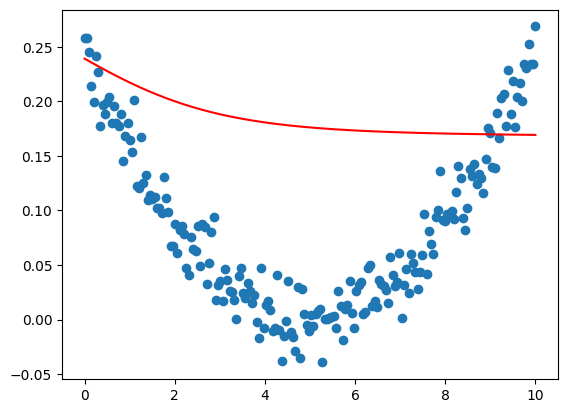

In [4]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.02,data.shape)
y=numpy.square(data/10)+noise
data = data+5

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.001)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对学习率的敏感程度：sigmoid<Tanh<ReLU

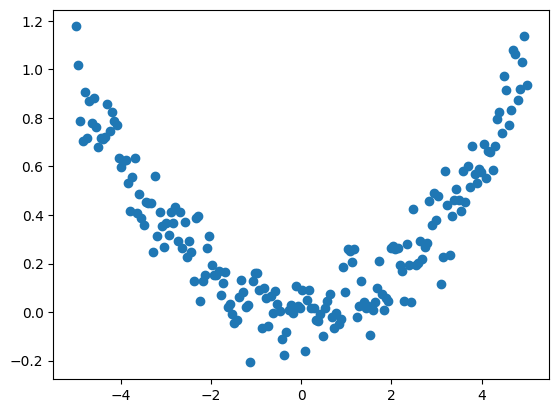

0
[[-0.11471935 -0.18551964 -0.25580814  0.5672832  -0.09450211  0.39781132
   0.23519956  0.11684669  0.3342055  -0.07778156]] [ 0.00589255 -0.0056091   0.01147461 -0.01557115 -0.00203998  0.02446009
 -0.0151957   0.01838272 -0.0112661  -0.03111896]
1
[[-0.11522647 -0.18543941 -0.2564032   0.567339   -0.09458523  0.39763364
   0.23570636  0.11586268  0.33442074 -0.07649886]] [ 0.009291   -0.00637201  0.01779877 -0.02230725 -0.00148395  0.03824326
 -0.01989235  0.02627113 -0.01473762 -0.04065417]
2
[[-0.11607056 -0.18539421 -0.25747532  0.5675834  -0.09479997  0.3972697
   0.23642677  0.11438689  0.33474553 -0.074758  ]] [ 0.01088643 -0.00650644  0.02150234 -0.02670862 -0.00108783  0.04750488
 -0.02208682  0.02973017 -0.01649874 -0.04419491]
3
[[-0.11696594 -0.18537816 -0.2586445   0.56785864 -0.09505159  0.3970835
   0.23714648  0.11291563  0.33506605 -0.07307035]] [ 0.01177011 -0.00653634  0.02423237 -0.0303935  -0.00085768  0.05512151
 -0.02354703  0.03158179 -0.01778016 -0.04583383

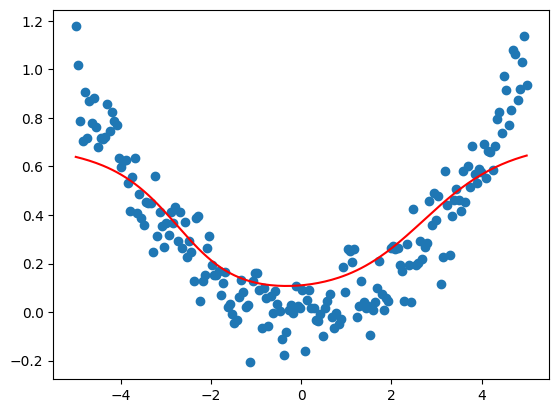

In [22]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=numpy.square(data/5)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=1.5)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()


>对定义域匹配的敏感程度：ReLU<sigmoid<Tanh

>对值域匹配的敏感程度：ReLU<Tanh<sigmoid
>>sigmoid娇生惯养，但凡它的值域与输出值域不匹配，那就是寄，因此不可以放在输出层

>由以上分析可以看出，其实ReLU才是最好的拟合方式，但是由于对学习率要求过于严格，与其他那俩配合不了，并且输出还是直线，对曲线拟合而言误差太大

##尝试组合不同的激活函数

###与线性激活函数配合

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,0.1,data.shape)
y=numpy.square(data/5)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=1.5)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(300):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()